In [ ]:
# Importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./dataset_pf_mineria_datos.csv')

In [ ]:
df.head()

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,NEGRO,S,77.750,622,F
1,NEGRO,M,55.250,442,F
2,NEGRO,UNI,59.750,478,EX
3,BEIGE,S,114.375,915,F
4,BEIGE,2XS,14.875,119,C


Nota: cada registro del dataframe representa un sku (características del producto)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 1234 non-null   object 
 1   talla                 1234 non-null   object 
 2   promedio_ventas_2025  1234 non-null   float64
 3   total_ventas_2025     1234 non-null   int64  
 4   tipo_prenda           1234 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.3+ KB


In [ ]:
# Modificacion de los tipos de datos
df['color'] = df['color'].astype('category')
df['talla'] = df['talla'].astype('category')
df['tipo_prenda'] = df['tipo_prenda'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   color                 1234 non-null   category
 1   talla                 1234 non-null   category
 2   promedio_ventas_2025  1234 non-null   float64 
 3   total_ventas_2025     1234 non-null   int64   
 4   tipo_prenda           1234 non-null   category
dtypes: category(3), float64(1), int64(1)
memory usage: 24.7 KB


In [ ]:
# Creacion del target (éxito en ventas)
umbral = df["total_ventas_2025"].quantile(0.75)
df["exito_ventas"] = (df["total_ventas_2025"] >= umbral).astype(int)

In [ ]:
data = df.copy()

In [ ]:
data.head(10)

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda,exito_ventas
0,NEGRO,S,77.750,622,F,1
1,NEGRO,M,55.250,442,F,1
2,NEGRO,UNI,59.750,478,EX,1
3,BEIGE,S,114.375,915,F,1
4,BEIGE,2XS,14.875,119,C,0
5,BEIGE,M,137.500,1100,SXA,1
6,NEGRO,S,86.375,691,SXA,1
7,NEGRO,XL,41.125,329,F,0
8,BEIGE,L,54.500,436,F,1
9,BEIGE,XS,31.625,253,F,0


In [ ]:
data.drop('promedio_ventas_2025', axis=1, inplace=True)
data.head()

,color,talla,total_ventas_2025,tipo_prenda,exito_ventas
0,NEGRO,S,622,F,1
1,NEGRO,M,442,F,1
2,NEGRO,UNI,478,EX,1
3,BEIGE,S,915,F,1
4,BEIGE,2XS,119,C,0


In [ ]:
# Suponiendo que tu DataFrame se llama 'df'
data['exito_ventas'] = data['exito_ventas'].replace({1: 'exito', 0: 'no_exito'})

<Axes: xlabel='color'>

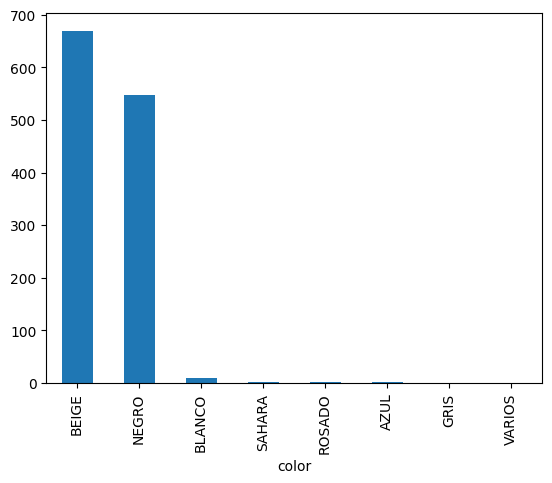

In [ ]:
#Descripción variables categóricas
data['color'].value_counts().plot(kind='bar')

<Axes: xlabel='talla'>

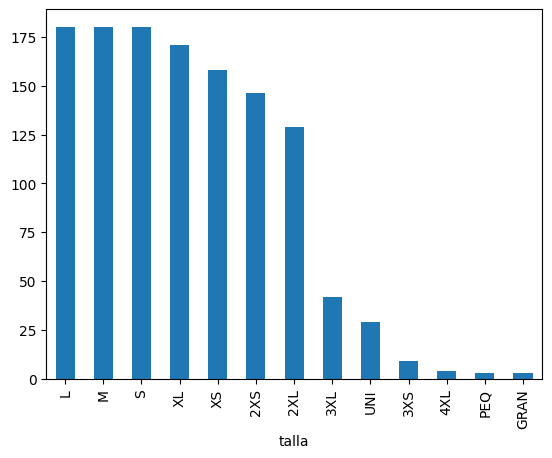

In [ ]:
data['talla'].value_counts().plot(kind='bar')

<Axes: xlabel='tipo_prenda'>

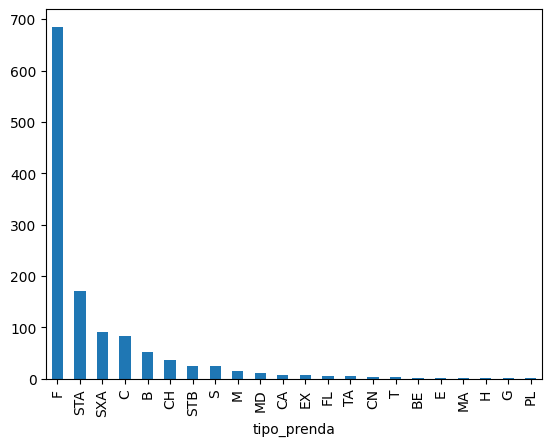

In [ ]:
data['tipo_prenda'].value_counts().plot(kind='bar')

<Axes: xlabel='exito_ventas'>

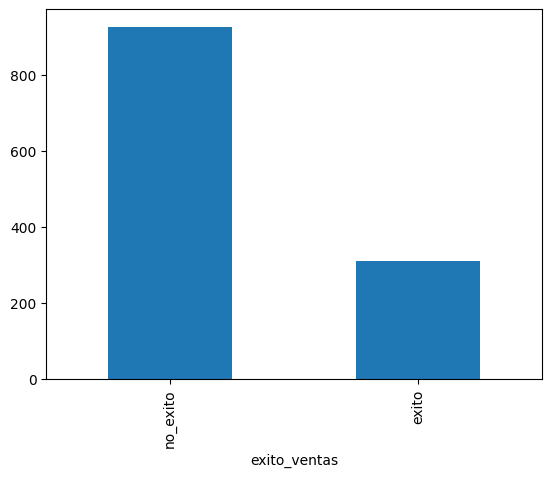

In [ ]:
data['exito_ventas'].value_counts().plot(kind='bar')

In [ ]:
data.head()

,color,talla,total_ventas_2025,tipo_prenda,exito_ventas
0,NEGRO,S,622,F,exito
1,NEGRO,M,442,F,exito
2,NEGRO,UNI,478,EX,exito
3,BEIGE,S,915,F,exito
4,BEIGE,2XS,119,C,no_exito


In [ ]:
# Contar los valores en la columna 'exito_ventas'
conteo_clases = data['exito_ventas'].value_counts()
print(conteo_clases)

exito_ventas
no_exito    925
exito       309
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTENC

# Features (incluye total_ventas_2025 como numérica)
X = data.drop(columns=["exito_ventas"])
y = data["exito_ventas"]

# Identificar columnas categóricas por índice
cat_features = [X.columns.get_loc(col) for col in ["color", "talla", "tipo_prenda"]]

# Conteo original
print("Antes del SMOTE:\n", y.value_counts())

# Calcular el tamaño objetivo para la clase 'exito'
n_no_exito = y.value_counts()["no_exito"]
n_exito_deseado = n_no_exito // 2  # la mitad de no_exito

# Definir la estrategia de oversampling
sampling_strategy = {"no_exito": n_no_exito, "exito": n_exito_deseado}

# Aplicar SMOTENC
smote_nc = SMOTENC(categorical_features=cat_features,
                   sampling_strategy=sampling_strategy,
                   random_state=42)

X_res, y_res = smote_nc.fit_resample(X, y)

# Verificar nuevo conteo
print("\nDespués del SMOTE:\n", y_res.value_counts())


Antes del SMOTE:
 exito_ventas
no_exito    925
exito       309
Name: count, dtype: int64

Después del SMOTE:
 exito_ventas
no_exito    925
exito       462
Name: count, dtype: int64


In [ ]:
df_balanceado = pd.DataFrame(X_res, columns=X.columns)
df_balanceado["exito_ventas"] = y_res

print(df_balanceado["exito_ventas"].value_counts())

exito_ventas
no_exito    925
exito       462
Name: count, dtype: int64


In [ ]:
df_balanceado.head()

,color,talla,total_ventas_2025,tipo_prenda,exito_ventas
0,NEGRO,S,622,F,exito
1,NEGRO,M,442,F,exito
2,NEGRO,UNI,478,EX,exito
3,BEIGE,S,915,F,exito
4,BEIGE,2XS,119,C,no_exito


In [ ]:
df_balanceado.drop('total_ventas_2025', axis=1, inplace=True)
df_balanceado.head()

,color,talla,tipo_prenda,exito_ventas
0,NEGRO,S,F,exito
1,NEGRO,M,F,exito
2,NEGRO,UNI,EX,exito
3,BEIGE,S,F,exito
4,BEIGE,2XS,C,no_exito


<Axes: xlabel='exito_ventas'>

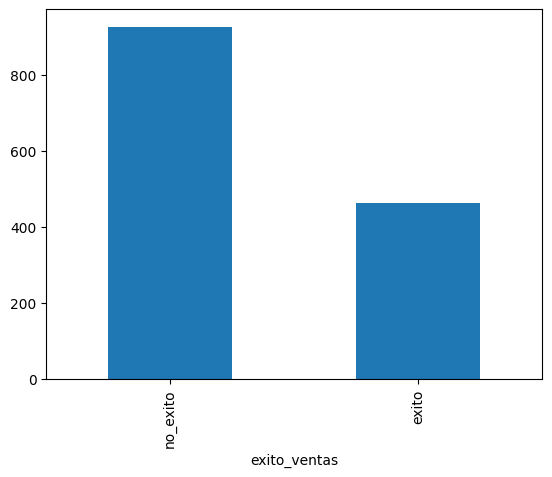

In [ ]:
df_balanceado['exito_ventas'].value_counts().plot(kind='bar')

In [ ]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
df_balanceado = pd.get_dummies(df_balanceado, columns=['color', 'talla', 'tipo_prenda'], drop_first=False, dtype=int)
df_balanceado.head()

,exito_ventas,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,talla_2XL,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,exito,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,exito,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,exito,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,exito,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,no_exito,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_balanceado["exito_ventas"]=labelencoder.fit_transform(df_balanceado["exito_ventas"]) #Objetivo
df_balanceado.head()

,exito_ventas,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,talla_2XL,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='exito_ventas'>

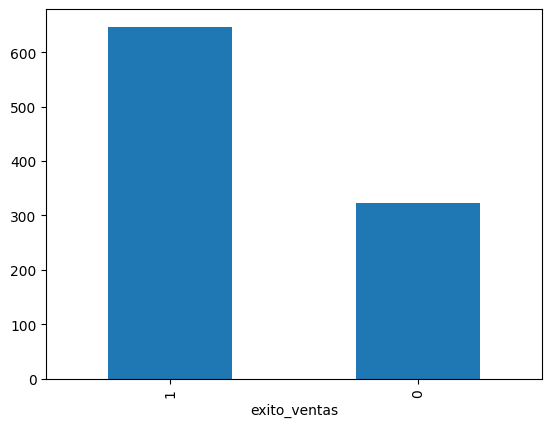

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = df_balanceado.drop("exito_ventas", axis = 1) # Variables predictoras
Y = df_balanceado['exito_ventas'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (REG. CLASIFICACION)
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='exito_ventas'>

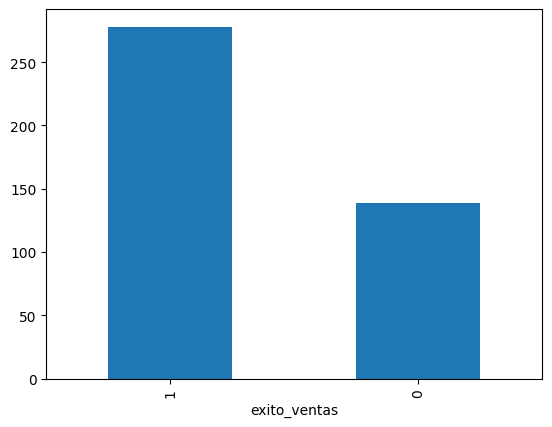

In [ ]:
# VARIABLE OBJETIVO DE TEST => 30%
Y_test.value_counts().plot(kind='bar')

# **TREE**

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

#criterion => indice de informacion
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=10)

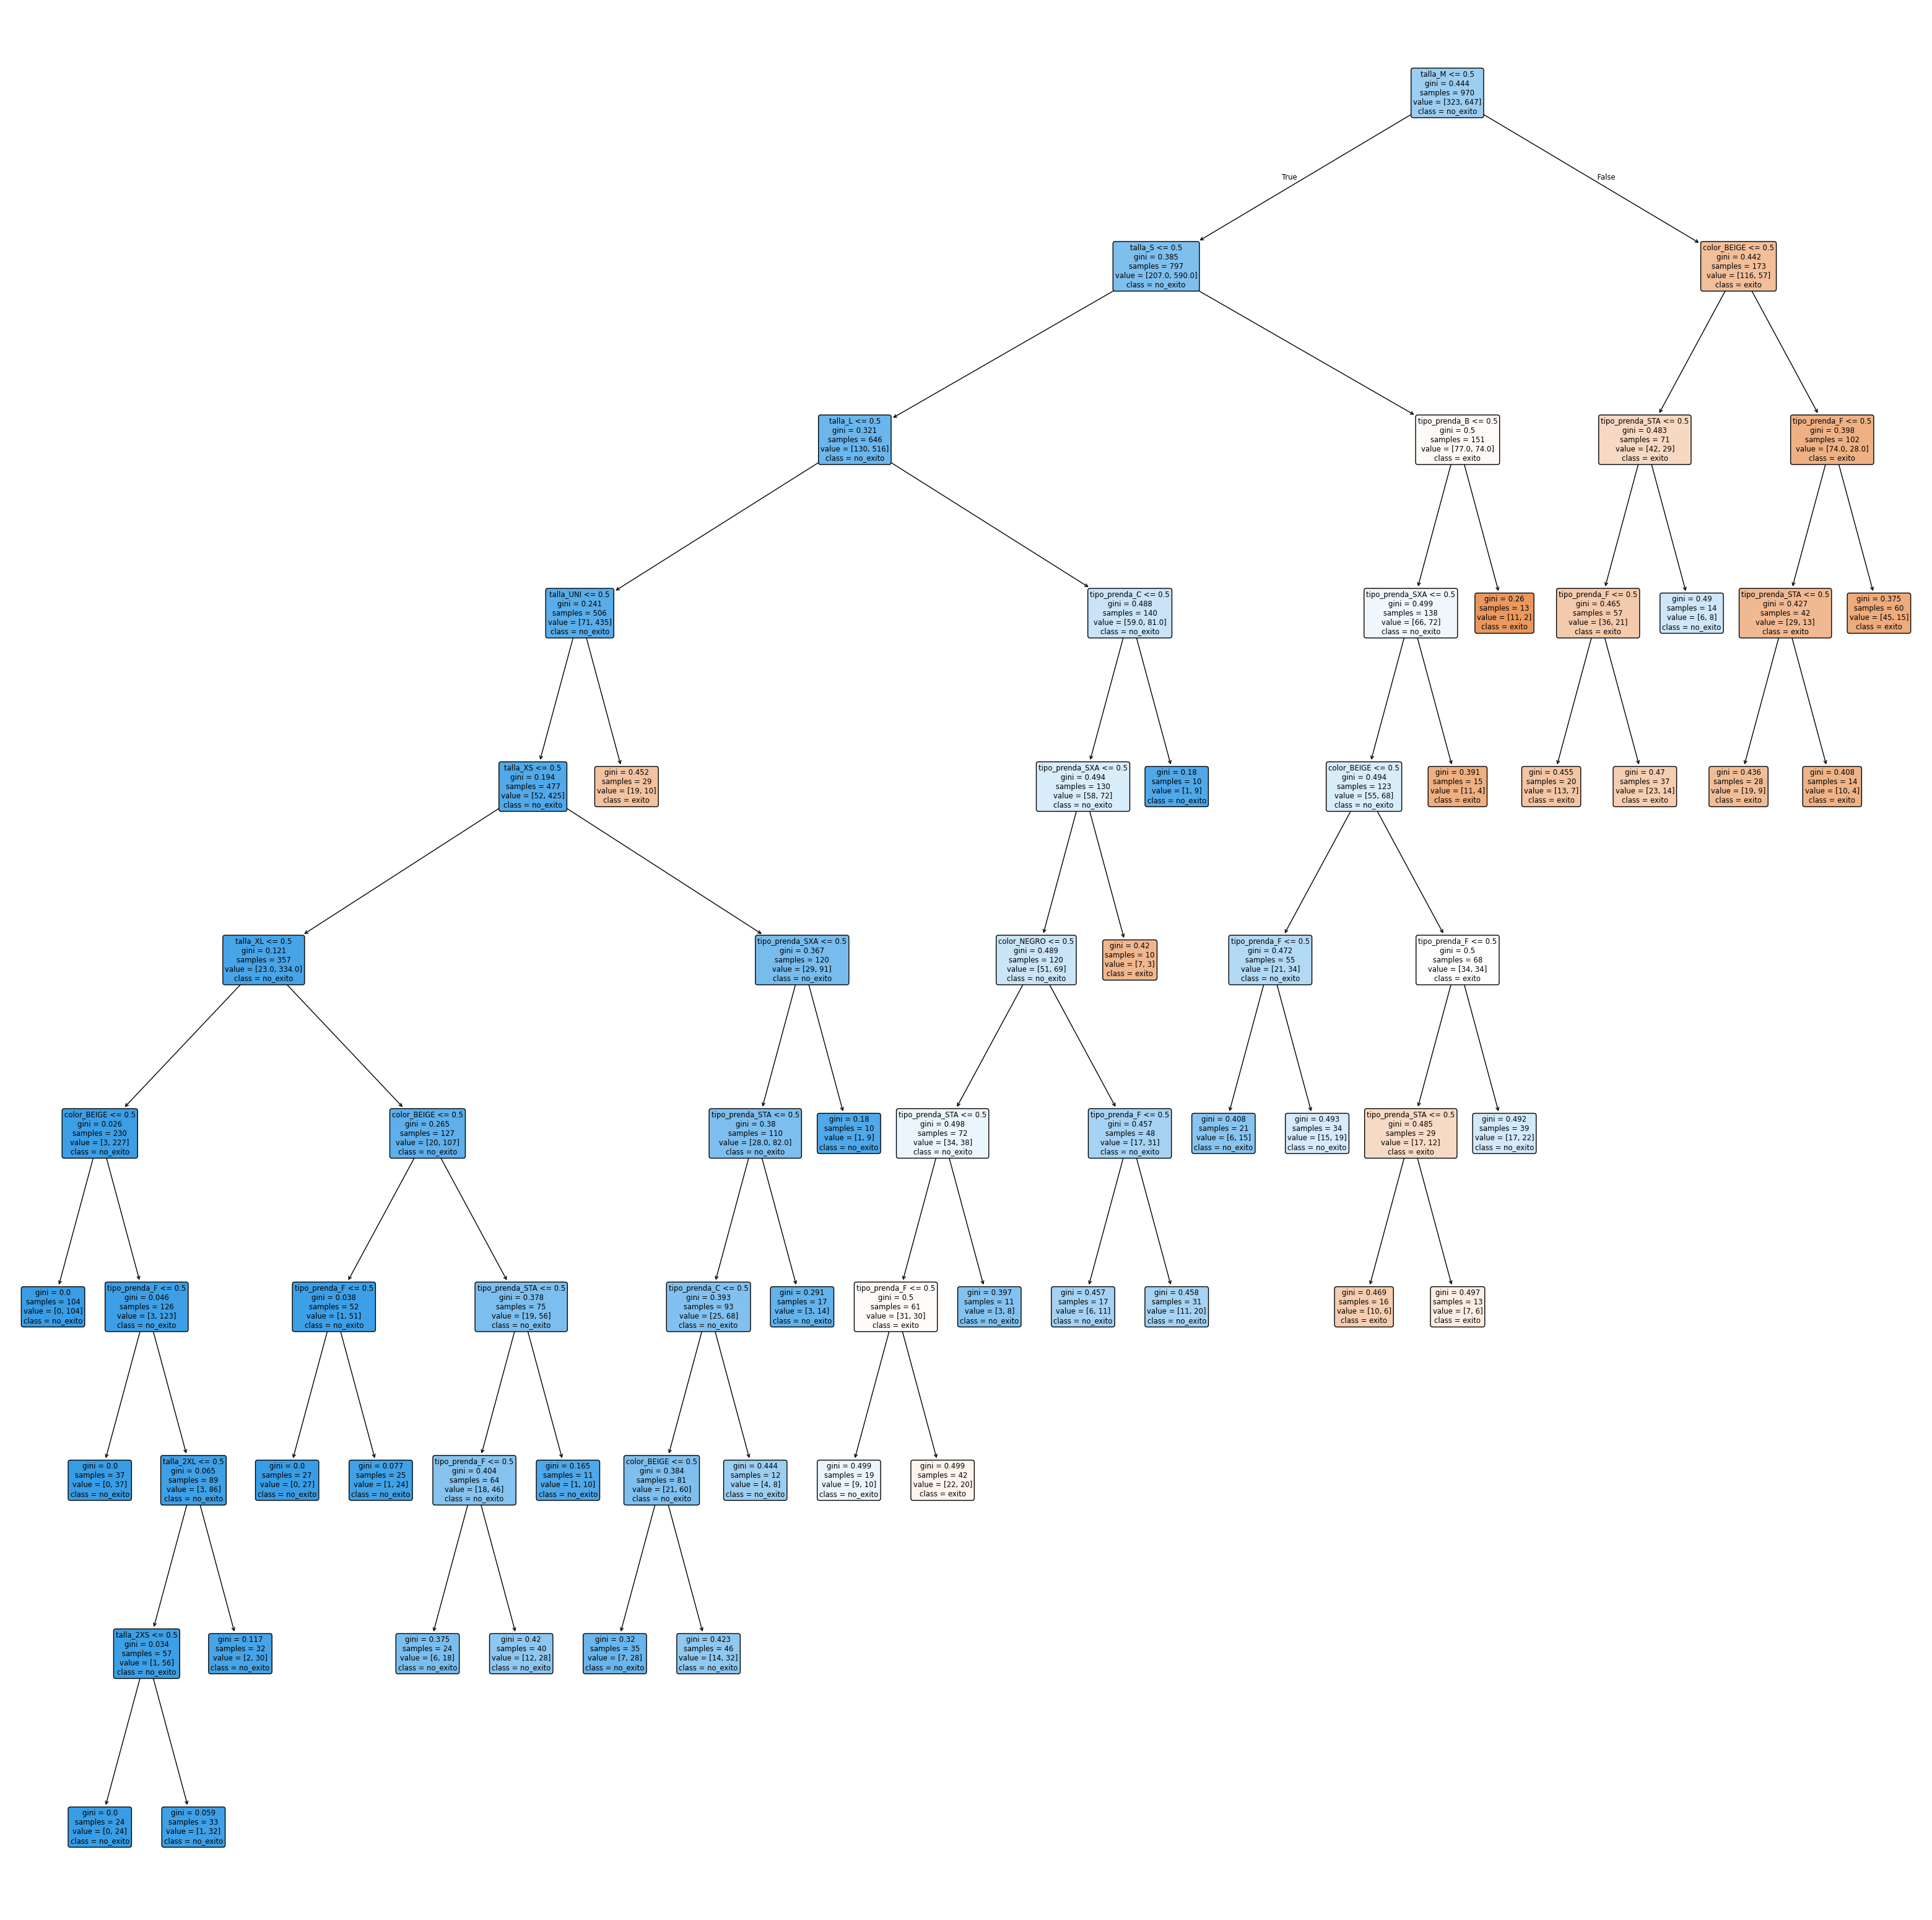

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 40)) #Tamaño de la imágen.
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [ ]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1]


In [ ]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.7721822541966427


In [ ]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[ 79,  60],
       [ 35, 243]])

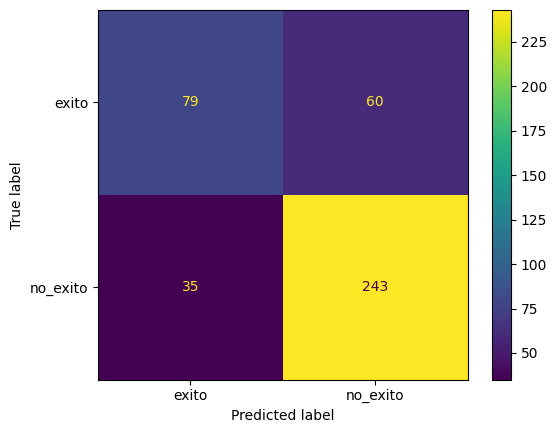

In [ ]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

       exito       0.69      0.57      0.62       139
    no_exito       0.80      0.87      0.84       278

    accuracy                           0.77       417
   macro avg       0.75      0.72      0.73       417
weighted avg       0.77      0.77      0.77       417



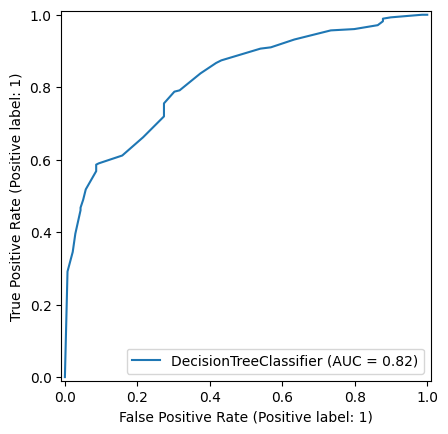

In [ ]:
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

# **KNN**

In [ ]:
df_balanceado.head()

,exito_ventas,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,talla_2XL,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean')

              precision    recall  f1-score   support

       exito       0.53      0.39      0.45       139
    no_exito       0.73      0.83      0.78       278

    accuracy                           0.68       417
   macro avg       0.63      0.61      0.61       417
weighted avg       0.67      0.68      0.67       417



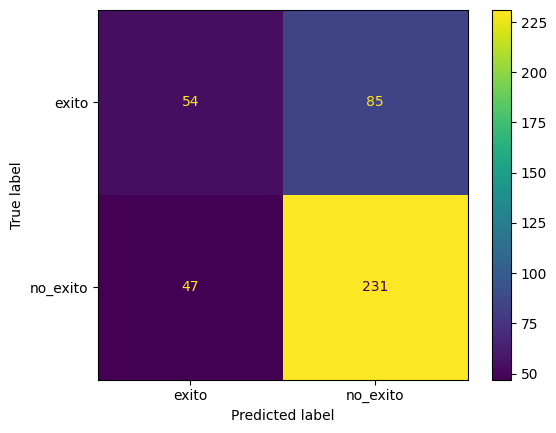

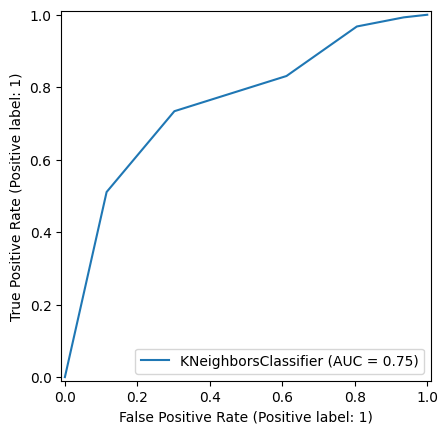

In [ ]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

# **RED NEURONAL**

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
#activation -> función activación de la oculta
#hidden_layer_sizes=5,7 -> dos capas ocultas con 5 neuronas y 7 neuronas
#learning_rate-> tamaño del paso constante o decreciente
#learning_rate_init-> valor tasa de aprendizaje
#momentum->
#max_iter-> iteaciones
#random_state-> semilla para generacion numeros seudoaletorios
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(15, 13), learning_rate='constant',
                     learning_rate_init=0.1, momentum= 0.2, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 13),
              learning_rate_init=0.1, max_iter=500, momentum=0.2,
              random_state=3)

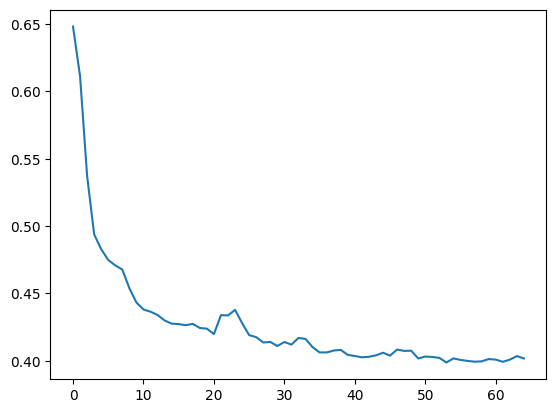

In [ ]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

       exito       0.68      0.55      0.61       139
    no_exito       0.79      0.87      0.83       278

    accuracy                           0.76       417
   macro avg       0.74      0.71      0.72       417
weighted avg       0.76      0.76      0.76       417



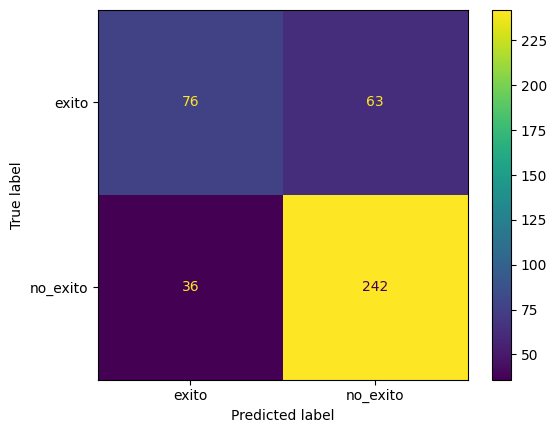

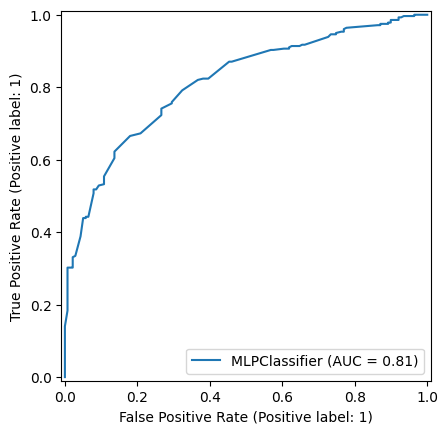

In [ ]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

# Maquinas de Vectores de Soporte (SVM)

In [ ]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

              precision    recall  f1-score   support

       exito       0.64      0.61      0.63       139
    no_exito       0.81      0.83      0.82       278

    accuracy                           0.76       417
   macro avg       0.73      0.72      0.72       417
weighted avg       0.75      0.76      0.76       417



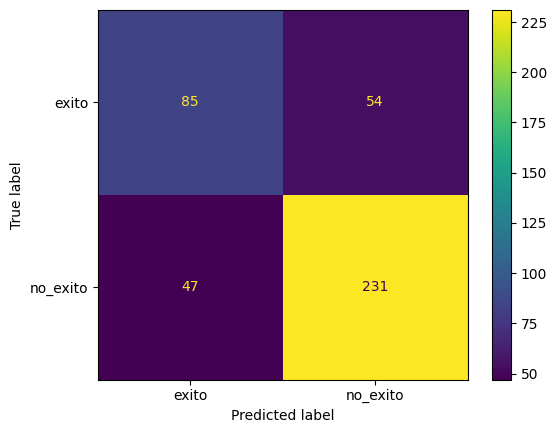

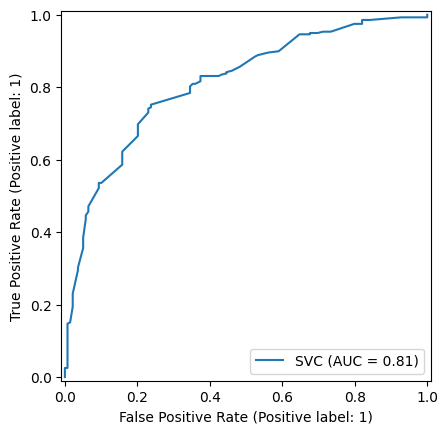

In [ ]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

# **RANDOM FOREST**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%


#Evaluación
Y_pred = model_rf.predict(X_test) #30%
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

       exito       0.74      0.38      0.50       139
    no_exito       0.75      0.93      0.83       278

    accuracy                           0.75       417
   macro avg       0.74      0.66      0.67       417
weighted avg       0.75      0.75      0.72       417



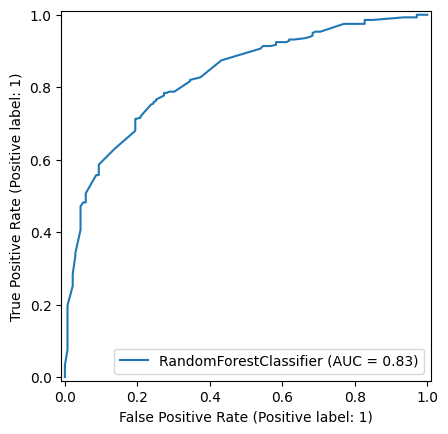

In [ ]:
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test, Y_test)

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#tasa de aprendizaje controla el tamaño de la actualización de cada modelo
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8,  min_samples_leaf=2, max_depth=10)
model_gbc.fit(X_train, Y_train) #70%


#Evaluación
Y_pred = model_gbc.predict(X_test) #30%
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

       exito       0.67      0.50      0.57       139
    no_exito       0.78      0.87      0.82       278

    accuracy                           0.75       417
   macro avg       0.72      0.69      0.70       417
weighted avg       0.74      0.75      0.74       417



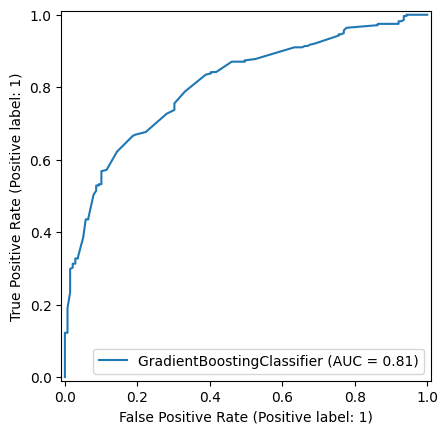

In [ ]:
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_gbc,X_test, Y_test)

# **XGBOOST**

In [ ]:
# XGboost: Optimización extrema de Gradient Boosting.
# Procesamiento en paralelo, regularización, maneja valores faltantes
import xgboost as xgb


model_xgb = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8  #enable_categorical=True,
)

model_xgb.fit(X_train, Y_train) #70%

#Evaluación
Y_pred = model_xgb.predict(X_test) #30%
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

       exito       0.69      0.52      0.59       139
    no_exito       0.79      0.88      0.83       278

    accuracy                           0.76       417
   macro avg       0.74      0.70      0.71       417
weighted avg       0.75      0.76      0.75       417



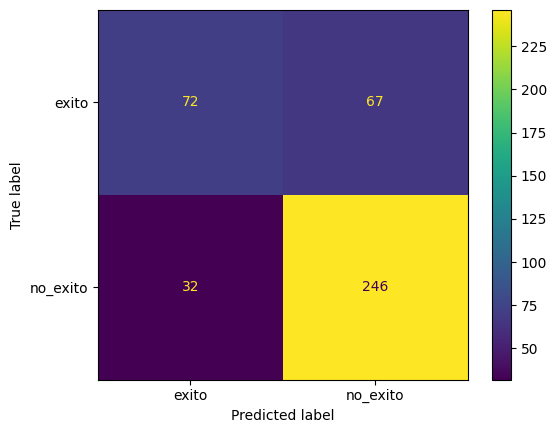

In [ ]:
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

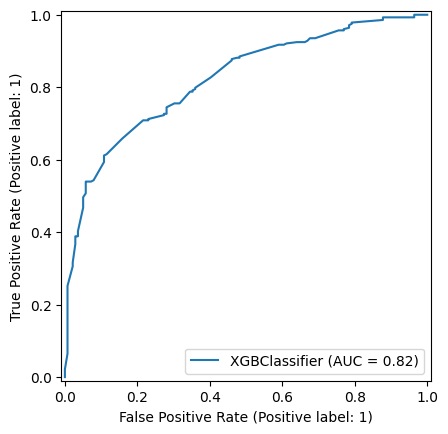

In [ ]:
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_xgb,X_test, Y_test)

# Almacenamiento del modelo para despliegue

In [ ]:
import pickle
filename = 'modelo.pkl'
variables= X.columns._values
pickle.dump([modelTree, modelKnn, modelNN, modelSVM, labelencoder,variables], open(filename, 'wb'))

In [239]:
import pickle
filename = 'modelo-clasificacion-svm.pkl'
variables=X.columns._values
pickle.dump([modelSVM, variables, labelencoder], open(filename, 'wb'))